In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt
import math
import datetime as dt
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('newresultado_join.csv', index_col='Date', parse_dates=True)
df = df.drop(labels=['Volume'], axis=1)
data_train = df[:738]
df

,High,Low,Open,Close,Adj Close,polarity,subjectivity
Date,,,,,,,
2017-01-02,60227.0,59371.0,60227.0,59589.0,59589.0,0.0,0.0
2017-01-03,61815.0,59631.0,59631.0,61814.0,61814.0,0.0,0.0
2017-01-04,61940.0,61302.0,61811.0,61589.0,61589.0,0.0,0.0
2017-01-05,62409.0,61594.0,61594.0,62071.0,62071.0,0.0,0.0
2017-01-06,62072.0,61396.0,62072.0,61665.0,61665.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-22,116903.0,115648.0,115825.0,116348.0,116348.0,0.0,0.0
2020-12-23,118311.0,116636.0,116636.0,117857.0,117857.0,0.0,0.0
2020-12-28,119213.0,117805.0,117806.0,119051.0,119051.0,0.0,0.0


In [4]:
X = np.asarray(df.iloc[:738, :-3])
y = np.asarray(df.iloc[:738, 4])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

In [7]:
X_scaled.shape

(738, 4)

In [8]:
new_scaled_df = pd.DataFrame(X_scaled, index=data_train.index)
new_scaled_df[4] = df['polarity'][:738].values
new_scaled_df[5] = df['subjectivity'][:738].values
new_scaled_df

,0,1,2,3,4,5
Date,,,,,,
2017-01-02,-1.653956,-1.636556,-1.613222,-1.659998,0.000,0.000000
2017-01-03,-1.544012,-1.618348,-1.654719,-1.505317,0.000,0.000000
2017-01-04,-1.535358,-1.501326,-1.502935,-1.520959,0.000,0.000000
2017-01-05,-1.502888,-1.480877,-1.518043,-1.487451,0.000,0.000000
2017-01-06,-1.526219,-1.494743,-1.484762,-1.515676,0.000,0.000000
...,...,...,...,...,...,...
2019-12-20,2.150028,2.226007,2.209650,2.200549,0.000,0.000000
2019-12-23,2.197937,2.256681,2.208675,2.252132,0.000,0.000000
2019-12-26,2.291888,2.306333,2.260546,2.345288,0.000,0.000000


In [9]:
X_train = []
y_train = []
for i in range(20, len(X)):
    X_train.append(new_scaled_df[i-20:i])
    y_train.append(y_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(718, 20, 6)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

In [12]:
regressor = Sequential()

In [13]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 6)))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(Dense(units = 1))

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mse')

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 4s 24ms/step - loss: 0.1425
Epoch 2/100
23/23 [==============================] - 1s 25ms/step - loss: 0.0426
Epoch 3/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0367
Epoch 4/100
23/23 [==============================] - 1s 27ms/step - loss: 0.0330
Epoch 5/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0311
Epoch 6/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0297
Epoch 7/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0298
Epoch 8/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0297
Epoch 9/100
23/23 [==============================] - 1s 27ms/step - loss: 0.0263
Epoch 10/100
23/23 [==============================] - 1s 26ms/step - loss: 0.0269
Epoch 11/100
23/23 [==============================] - 1s 29ms/step - loss: 0.0264
Epoch 12/100
23/23 [==============================] - 1s 40ms/step - loss: 0.0266
Epoch 13/100
23/23 [=====

23/23 [==============================] - 1s 35ms/step - loss: 0.0123


In [19]:
dataset_test = pd.read_csv('newresultado_test.csv', index_col='Date')
dataset_test = dataset_test.drop(labels=['Volume'], axis=1)
real_stock_price = dataset_test.iloc[:, 4:5].values
dataset_test

,High,Low,Open,Close,Adj Close,polarity,subjectivity
Date,,,,,,,
2020-01-02,118573.0,115649.0,115652.0,118573.0,118573.0,0.500000,0.298535
2020-01-03,118792.0,117341.0,118564.0,117707.0,117707.0,0.000000,0.000000
2020-01-06,117707.0,116269.0,117707.0,116878.0,116878.0,0.500000,0.196970
2020-01-07,117076.0,115965.0,116872.0,116662.0,116662.0,0.333333,0.209848
2020-01-08,117335.0,115693.0,116667.0,116247.0,116247.0,0.000000,0.041667
...,...,...,...,...,...,...,...
2020-12-22,116903.0,115648.0,115825.0,116348.0,116348.0,0.000000,0.000000
2020-12-23,118311.0,116636.0,116636.0,117857.0,117857.0,0.000000,0.000000
2020-12-28,119213.0,117805.0,117806.0,119051.0,119051.0,0.000000,0.000000


In [20]:
dataset_total = pd.concat((df, dataset_test), axis = 0)
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - 20:, :-3]
inputs = scaler.transform(inputs)

In [21]:
new_test = dataset_total[len(dataset_total) - len(dataset_test) - 20:]

In [22]:
scaled_test = pd.DataFrame(inputs, index=new_test.index)
scaled_test[4] = new_test['polarity'].values
scaled_test[5] = new_test['subjectivity'].values

In [23]:
scaled_test = scaled_test.reset_index()
scaled_test['Date'] = scaled_test['Date'].dt.date
scaled_test = scaled_test.set_index(['Date'])
scaled_test

C:\Users\Lucas\AppData\Local\Temp/ipykernel_11584/3973159510.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  scaled_test = scaled_test.reset_index()


,0,1,2,3,4,5
Date,,,,,,
2020-12-01,1.919410,1.831802,1.775464,1.937349,0.00,0.00000
2020-12-02,1.952296,1.949594,1.949876,1.970649,0.00,0.00000
2020-12-03,2.025822,2.040285,1.982740,2.047468,0.00,0.00000
2020-12-04,2.059539,2.069698,2.011982,2.100511,0.00,0.00000
2020-12-07,2.105718,2.093158,2.113427,2.096548,0.25,0.16625
...,...,...,...,...,...,...
2020-12-22,2.269941,2.304582,2.257831,2.285849,0.00,0.00000
2020-12-23,2.367422,2.373773,2.314297,2.390754,0.00,0.00000
2020-12-28,2.429871,2.455639,2.395760,2.473760,0.00,0.00000


In [24]:
X_test = []
for i in range(20, len(inputs)):
    X_test.append(scaled_test[i-20:i])
X_test = np.array(X_test)

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))
predicted_stock_price = regressor.predict(X_test)

In [26]:
y_test_scaled = y_scaler.transform(real_stock_price)
mse = mean_squared_error(y_test_scaled, predicted_stock_price)
mse

0.06624370436681393

In [27]:
predicted_stock_price = y_scaler.inverse_transform(predicted_stock_price)

In [28]:
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)
mape = mean_absolute_percentage_error(real_stock_price, predicted_stock_price)
mse = mean_squared_error(real_stock_price, predicted_stock_price, squared=False)

print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)
print('MAPE: %.3f' % mape)
print('MSE: %.3f' % mse)

MAE: 2349.839
R2: 0.926
MAPE: 0.026
MSE: 3702.259


In [29]:
new_predicted = pd.DataFrame(predicted_stock_price, columns=['Adj Close'], index=dataset_test.index)
new_real_values = pd.DataFrame(dataset_test['Adj Close'])
new_twitter = pd.DataFrame(dataset_test['polarity'])

In [30]:
new_real_values.index = pd.to_datetime(new_real_values.index)
new_predicted.index = pd.to_datetime(new_predicted.index)

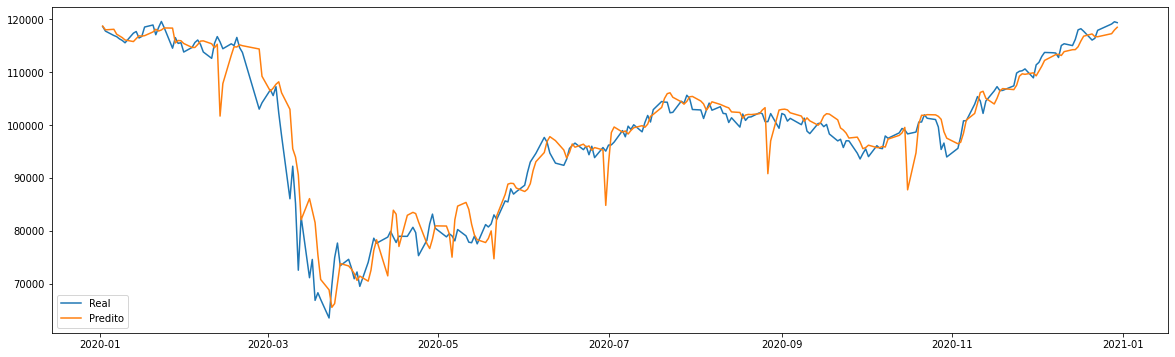

In [31]:
rcParams['figure.figsize'] = 20, 6
plt.pyplot.plot(new_real_values, label='Real')
plt.pyplot.plot(new_predicted, label='Predito')
plt.pyplot.legend()
plt.pyplot.show()